In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df1 = pd.read_csv("linear_line-datas.csv")

In [3]:
df1.head()

,x,y
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


In [5]:
df1.duplicated().sum()

np.int64(0)

In [6]:
df1.isna().sum()

x    0
y    0
dtype: int64

In [ ]:
df1 = df1.rename(columns={"x":"height","y":"weight"})
df1


,height,weight
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894
...,...,...
95,3.133243,6.243956
96,9.130416,29.483101
97,6.163115,24.484586
98,1.025833,12.668934


Text(0.5, 1.0, '<----relation between height and weight---->')

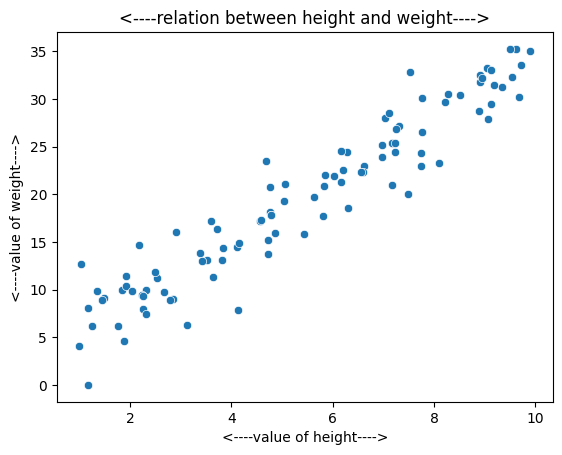

In [18]:
plt.Figure(figsize=(6,4))
sns.scatterplot(x = "height", y = "weight",data = df1)
plt.xlabel("<----value of height---->")
plt.ylabel("<----value of weight---->")
plt.title("<----relation between height and weight---->")

<Axes: >

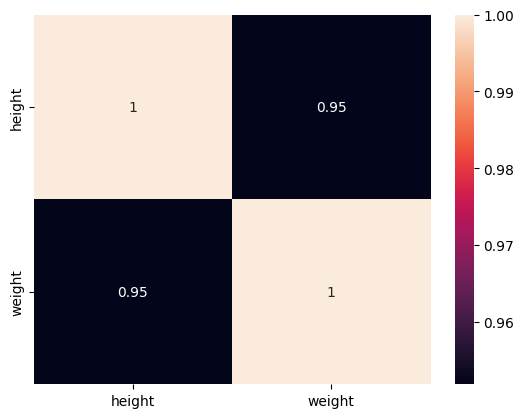

In [19]:
plt.Figure(figsize=(6,4))
sns.heatmap(df1.corr(),annot=True)

In [20]:
x = df1[["height"]]
y = df1[["weight"]]

In [21]:
x.head()

,height
0,4.753198
1,7.482920
2,1.001029
3,3.720993
4,2.320803


In [22]:
df1.head()

,height,weight
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.20)


In [25]:
lr = LinearRegression()

In [26]:
model = lr.fit(xtrain, ytrain)

In [30]:
model.score(xtrain,ytrain)


0.8972642924932968

In [29]:
model.score(xtest,ytest)

0.9379605847824561

In [31]:
xtest.head()

,height
15,7.034208
17,6.028208
90,2.032714
57,2.320557
79,7.533982


In [32]:
ytest.head()

,weight
15,27.999626
17,21.897147
90,9.841954
57,7.480049
79,32.796380


In [33]:
df1.head()

,height,weight
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


In [39]:
df1["predict"] = model.predict(df1[["height"]])

In [37]:
df1.head()

,height,weight,predict
0,4.753198,18.144798,17.545874
1,7.482920,20.002888,25.923987
2,1.001029,4.084733,6.029650
3,3.720993,16.327152,14.377812
4,2.320803,9.982894,10.080323


In [40]:
df1["error"] = df1["weight"] - df1["predict"]

In [41]:
df1.head()

,height,weight,predict,error
0,4.753198,18.144798,17.545874,0.598925
1,7.482920,20.002888,25.923987,-5.921099
2,1.001029,4.084733,6.029650,-1.944917
3,3.720993,16.327152,14.377812,1.949340
4,2.320803,9.982894,10.080323,-0.097429


In [42]:
ytest.head()

,weight
15,27.999626
17,21.897147
90,9.841954
57,7.480049
79,32.796380


In [47]:
pred_y = model.predict(xtest)
pred_y

array([[24.546789  ],
       [21.45915845],
       [ 9.19611463],
       [10.0795688 ],
       [26.08070515],
       [ 9.90439403],
       [11.67406762],
       [13.77318456],
       [ 9.82394949],
       [20.24925297],
       [15.57190159],
       [ 8.5771565 ],
       [17.46394351],
       [33.34176242],
       [26.76974469],
       [30.981127  ],
       [23.19956775],
       [25.35588901],
       [20.91020474],
       [21.88531934]])

In [49]:
mse = mean_squared_error(ytest, pred_y)
mse

4.834553974199254

In [50]:
mae = mean_absolute_error(ytest,pred_y)
mae

1.6507588079938202

In [51]:
r2_value = r2_score(ytest,pred_y)
r2_value

0.9379605847824561

In [52]:

m = model.coef_
m

array([[3.06921789]])

In [53]:
# find the value of c
c = model.intercept_
c

array([2.9572732])

In [54]:
y = m*50 + c
y

array([[156.41816784]])

Text(0.5, 1.0, '<----relation betwin height and weight---->')

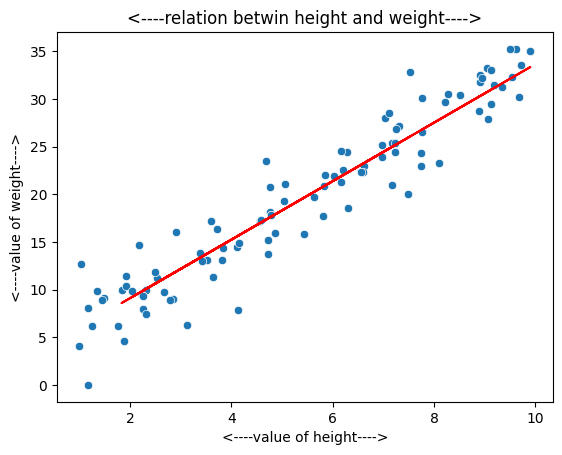

In [57]:
# best fit line
plt.Figure(figsize=(6,4))
sns.scatterplot(x="height", y="weight", data=df1)
plt.plot(xtest, pred_y, color = "r")
plt.xlabel("<----value of height---->")
plt.ylabel("<----value of weight---->")
plt.title("<----relation betwin height and weight---->")